# A/B Testing

In [5]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

import statsmodels.stats.api as sms
from scipy.stats import bernoulli, beta 

from bayes import *

#### Comparación clicks totales vs objetivo

In [6]:
# los datos son conocidos: impresiones, conversiones, control y test
imps_ctrl, convs_ctrl= 15, 1
imps_test, convs_test= 15, 9

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

print ('Tasas', CR_ctrl, CR_test)

Tasas 0.06666666666666667 0.6


In [7]:
a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test

beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [8]:
beta_control.mean(), beta_test.mean()

(0.11764705882352941, 0.5882352941176471)

In [9]:
salto = (beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

4.0

In [21]:
prob=1-calc_prob(beta_control, beta_test)  # esta funcion es la clave

prob

0.9989730940981122

In [22]:
'''El test ### la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test ### la tasa de conversion en un 400.00%, con una probabilidad del 99.90%'

0.06666666666666667 0.6


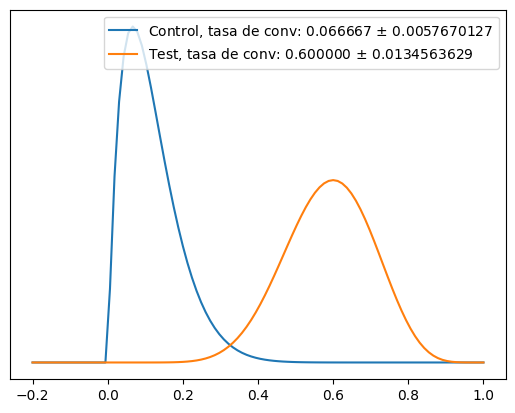

In [16]:
print (CR_ctrl, CR_test)

plot([beta_control, beta_test], ['Control', 'Test'], linf=-0.2, lsup = 1)

#### Comparación media de tiempo

In [23]:
# los datos son conocidos: impresiones, conversiones, control y test
imps_ctrl, convs_ctrl= 15, 5
imps_test, convs_test= 15, 12

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

print ('Tasas', CR_ctrl, CR_test)

Tasas 0.3333333333333333 0.8


In [24]:
a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test

beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [25]:
beta_control.mean(), beta_test.mean()

(0.35294117647058826, 0.7647058823529411)

In [26]:
salto = (beta_test.mean() - beta_control.mean())/beta_control.mean()

salto

1.1666666666666663

In [27]:
prob=1-calc_prob(beta_control, beta_test)  # esta funcion es la clave

prob

0.9943288966722073

In [28]:
'''El test ### la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test ### la tasa de conversion en un 116.67%, con una probabilidad del 99.43%'

0.3333333333333333 0.8


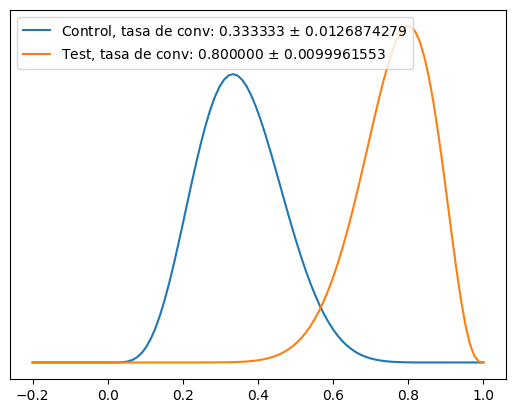

In [29]:
print (CR_ctrl, CR_test)

plot([beta_control, beta_test], ['Control', 'Test'], linf=-0.2, lsup = 1)